<a href="https://colab.research.google.com/github/jay-kanakia/Deep-Learning/blob/main/5_Batch_vs_stochastic_GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/jay-kanakia/Deep-Learning-CampusX/refs/heads/main/Datasets/Social_Network_Ads.csv')

In [3]:
df.sample(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
337,15612465,Male,35,79000,0
94,15786993,Female,29,83000,0


In [4]:
df.drop(columns=['User ID'],inplace=True)

In [5]:
df.sample(1)

,Gender,Age,EstimatedSalary,Purchased
340,Female,53,104000,1


In [7]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(drop='first',sparse_output=False)

In [10]:
df[ohe.get_feature_names_out(['Gender'])] = pd.DataFrame(
    ohe.fit_transform(df[['Gender']]),
    columns=ohe.get_feature_names_out(['Gender']),
    index=df.index
)


In [12]:
ohe.get_feature_names_out()

array(['Gender_Male'], dtype=object)

In [11]:
df.sample(1)

,Gender,Age,EstimatedSalary,Purchased,Gender_Male
9,Female,35,65000,0,0.0


In [13]:
df.drop(columns=['Gender'],inplace=True)

In [14]:
df.sample(1)

,Age,EstimatedSalary,Purchased,Gender_Male
87,28,85000,0,0.0


In [24]:
X=df.drop(columns=['Purchased'])
y=df['Purchased']

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [27]:
X_train.sample(1)

,Age,EstimatedSalary,Gender_Male
397,50,20000,0.0


In [29]:
X_train_scaled=ss.fit_transform(X_train)
X_test_scaled=ss.transform(X_test)

In [31]:
X_train_scaled.shape

(320, 3)

In [32]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [33]:
model=Sequential()
model.add(Dense(10,activation='relu',input_dim=X_train_scaled.shape[1]))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161 (644.00 B)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [36]:
history=model.fit(X_train_scaled,y_train,batch_size=1,epochs=30)

Epoch 1/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6995 - loss: 0.5760
Epoch 2/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7914 - loss: 0.4482
Epoch 3/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8091 - loss: 0.4071
Epoch 4/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8509 - loss: 0.3324
Epoch 5/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8205 - loss: 0.3831
Epoch 6/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8623 - loss: 0.3392
Epoch 7/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8926 - loss: 0.2893
Epoch 8/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8797 - loss: 0.2920
Epoch 9/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8678 - loss: 0.3129
Epoch 10/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8908 - loss: 0.2834
Epoch 11/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8827 - loss: 0.2837
Epoch 12/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/ste

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

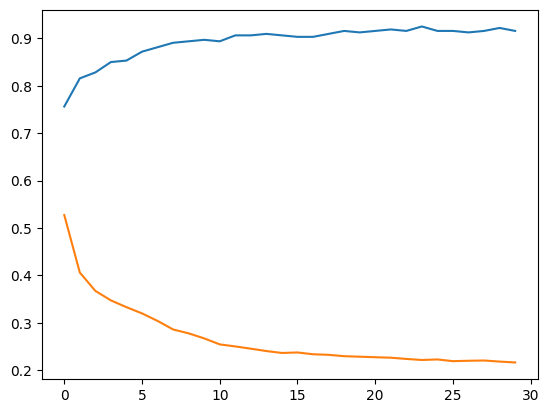

In [38]:
sns.lineplot(history.history['accuracy'])
sns.lineplot(history.history['loss'])
plt.show()

In [42]:
model1=Sequential()
model1.add(Dense(10,activation='relu',input_dim=X_train_scaled.shape[1]))
model1.add(Dense(10,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 10)             │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161 (644.00 B)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 0 (0.00 B)

In [44]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [46]:
history1=model1.fit(X_train_scaled,y_train,batch_size=32,epochs=30,validation_split=0.2,verbose=2)

Epoch 1/30
8/8 - 3s - 360ms/step - accuracy: 0.4102 - loss: 0.7451 - val_accuracy: 0.4062 - val_loss: 0.7374
Epoch 2/30
8/8 - 0s - 38ms/step - accuracy: 0.4453 - loss: 0.7157 - val_accuracy: 0.4688 - val_loss: 0.7103
Epoch 3/30
8/8 - 0s - 35ms/step - accuracy: 0.4648 - loss: 0.6910 - val_accuracy: 0.4688 - val_loss: 0.6850
Epoch 4/30
8/8 - 0s - 24ms/step - accuracy: 0.4883 - loss: 0.6683 - val_accuracy: 0.5312 - val_loss: 0.6626
Epoch 5/30
8/8 - 0s - 32ms/step - accuracy: 0.5781 - loss: 0.6475 - val_accuracy: 0.6250 - val_loss: 0.6427
Epoch 6/30
8/8 - 0s - 32ms/step - accuracy: 0.6680 - loss: 0.6296 - val_accuracy: 0.7344 - val_loss: 0.6238
Epoch 7/30
8/8 - 0s - 28ms/step - accuracy: 0.7305 - loss: 0.6133 - val_accuracy: 0.7344 - val_loss: 0.6057
Epoch 8/30
8/8 - 0s - 26ms/step - accuracy: 0.7773 - loss: 0.5962 - val_accuracy: 0.8281 - val_loss: 0.5895
Epoch 9/30
8/8 - 0s - 22ms/step - accuracy: 0.8281 - loss: 0.5824 - val_accuracy: 0.8750 - val_loss: 0.5730
Epoch 10/30
8/8 - 0s - 43ms

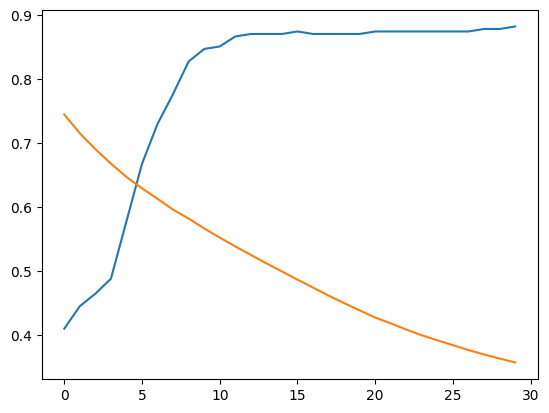

In [47]:
sns.lineplot(history1.history['accuracy'])
sns.lineplot(history1.history['loss'])
plt.show()

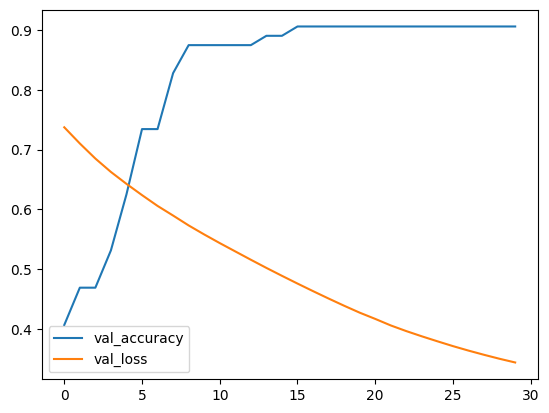

In [48]:
sns.lineplot(history1.history['val_accuracy'],label='val_accuracy')
sns.lineplot(history1.history['val_loss'],label='val_loss')
plt.legend()
plt.show()